In [216]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [54]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [55]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [56]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [67]:
matches.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [68]:
matches.team1.nunique()

15

In [69]:
matches["year"] = matches.date.apply(lambda x: int(x[:4]))

In [73]:
list(matches.year.unique())

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [86]:
team_list = list(matches[(matches.year == 2008)].team1.unique())
team_list

['Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Chennai Super Kings']

In [87]:
#team_list.remove('Kings XI Punjab')


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [79]:
team_list

['Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Chennai Super Kings']

In [332]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Kings XI Punjab'

In [333]:
matches[(matches.year == 2008) & (matches.team1==team1) & (matches.team2==team2)].id

24    336006
Name: id, dtype: int64

In [334]:
matches[(matches.year == 2008) & (matches.team1==team2) & (matches.team2==team1)].id

34    336016
Name: id, dtype: int64

In [335]:
mat = matches[(matches.year == 2008) & (matches.team1.isin([team1,team2])) & (matches.team2.isin([team1,team2]))]
mat

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
24,336006,Bangalore,2008-05-05,S Sreesanth,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,SJ Davis,BR Doctrove,2008
34,336016,Chandigarh,2008-05-12,SE Marsh,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Kings XI Punjab,wickets,9.0,N,NaN,BR Doctrove,I Shivram,2008


In [336]:
list(mat.date)

['2008-05-05', '2008-05-12']

In [337]:
list(mat.venue)

['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali']

In [338]:
m = ["Date : " + i + " | Venue : " + j for i,j in zip(list(mat.date),list(mat.venue))]
m

['Date : 2008-05-05 | Venue : M Chinnaswamy Stadium',
 'Date : 2008-05-12 | Venue : Punjab Cricket Association Stadium, Mohali']

In [339]:
mat[1:]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
34,336016,Chandigarh,2008-05-12,SE Marsh,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Kings XI Punjab,wickets,9.0,N,NaN,BR Doctrove,I Shivram,2008


In [340]:
mat_detail = pd.DataFrame(mat.iloc[0])
mat_detail

,24
id,336006
city,Bangalore
date,2008-05-05
player_of_match,S Sreesanth
venue,M Chinnaswamy Stadium
neutral_venue,0
team1,Royal Challengers Bangalore
team2,Kings XI Punjab
toss_winner,Kings XI Punjab
toss_decision,field


In [341]:
city = ["City",list(mat_detail.loc['city'])[0]]
date = ["Date",list(mat_detail.loc['date'])[0]]
venue = ["Venue",list(mat_detail.loc['venue'])[0]]
toss_w = ["Toss Winner",list(mat_detail.loc['toss_winner'])[0]]
toss_d = ["Toss Decision",list(mat_detail.loc['toss_decision'])[0]]
winner = ["Winner",list(mat_detail.loc['winner'])[0]]
result = ["Result","Won by " + str(int(list(mat_detail.loc['result_margin'])[0])) + " " + str(list(mat_detail.loc['result'])[0])]
potm = ["Player of the Match",list(mat_detail.loc['player_of_match'])[0]]
u1 = ["Umpire 1",list(mat_detail.loc['umpire1'])[0]]
u2 = ["Umpire 2",list(mat_detail.loc['umpire2'])[0]]
eli = ["Eliminator", "No" if list(mat_detail.loc['umpire1'])[0]=='N' else "Yes"]

final_table = pd.DataFrame([date,venue,toss_w,toss_d,winner,result,potm,u1,u2,eli],columns=["",""])

In [342]:
final_table

,,
0,Date,2008-05-05
1,Venue,M Chinnaswamy Stadium
2,Toss Winner,Kings XI Punjab
3,Toss Decision,field
4,Winner,Kings XI Punjab
5,Result,Won by 6 wickets
6,Player of the Match,S Sreesanth
7,Umpire 1,SJ Davis
8,Umpire 2,BR Doctrove
9,Eliminator,Yes


In [343]:
print(final_table.to_string(index=False))

                                           
                Date             2008-05-05
               Venue  M Chinnaswamy Stadium
         Toss Winner        Kings XI Punjab
       Toss Decision                  field
              Winner        Kings XI Punjab
              Result       Won by 6 wickets
 Player of the Match            S Sreesanth
            Umpire 1               SJ Davis
            Umpire 2            BR Doctrove
          Eliminator                    Yes


In [344]:
from tabulate import tabulate

tab = tabulate(final_table, tablefmt = 'fancy_grid',numalign="center",showindex=False)
print(tab)

╒═════════════════════╤═══════════════════════╕
│ Date                │ 2008-05-05            │
├─────────────────────┼───────────────────────┤
│ Venue               │ M Chinnaswamy Stadium │
├─────────────────────┼───────────────────────┤
│ Toss Winner         │ Kings XI Punjab       │
├─────────────────────┼───────────────────────┤
│ Toss Decision       │ field                 │
├─────────────────────┼───────────────────────┤
│ Winner              │ Kings XI Punjab       │
├─────────────────────┼───────────────────────┤
│ Result              │ Won by 6 wickets      │
├─────────────────────┼───────────────────────┤
│ Player of the Match │ S Sreesanth           │
├─────────────────────┼───────────────────────┤
│ Umpire 1            │ SJ Davis              │
├─────────────────────┼───────────────────────┤
│ Umpire 2            │ BR Doctrove           │
├─────────────────────┼───────────────────────┤
│ Eliminator          │ Yes                   │
╘═════════════════════╧═════════════════

In [345]:
mat

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
24,336006,Bangalore,2008-05-05,S Sreesanth,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,SJ Davis,BR Doctrove,2008
34,336016,Chandigarh,2008-05-12,SE Marsh,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Kings XI Punjab,wickets,9.0,N,NaN,BR Doctrove,I Shivram,2008


In [346]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [347]:
mat.iloc[0].id

336006

In [348]:
cur_mat = deliveries[deliveries.id == mat.iloc[0].id]
cur_mat.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
5688,336006,2,1,1,JR Hopes,SE Marsh,Z Khan,4,0,4,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore
5689,336006,2,0,4,SE Marsh,JR Hopes,DW Steyn,0,0,0,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore
5690,336006,2,0,5,SE Marsh,JR Hopes,DW Steyn,0,0,0,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore
5691,336006,2,0,6,SE Marsh,JR Hopes,DW Steyn,0,4,4,0,0,NaN,NaN,NaN,legbyes,Kings XI Punjab,Royal Challengers Bangalore
5692,336006,2,1,5,RR Sarwan,SE Marsh,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore


In [349]:
cur_mat["cur_over"] = cur_mat.over + (cur_mat.ball/10)

<ipython-input-349-01cb4645ab21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_mat["cur_over"] = cur_mat.over + (cur_mat.ball/10)


In [350]:
cur_mat["cur_over"]

5688     1.1
5689     0.4
5690     0.5
5691     0.6
5692     1.5
        ... 
5921    10.3
5922    10.4
5923    10.1
5924    10.2
5925    10.5
Name: cur_over, Length: 238, dtype: float64

In [351]:
cur_mat = cur_mat.sort_values(by=['cur_over'])

In [352]:
cur_mat_1 = cur_mat[cur_mat.batting_team == 'Royal Challengers Bangalore'].reset_index()
#cur_mat_1["total_score"] = np.array([0]*len(cur_mat_1))
cur_mat_1["total_score"] = cur_mat_1.total_runs
for i in range(1,len(cur_mat_1.total_score)) :
    cur_mat_1.iloc[i,-1] +=  cur_mat_1.iloc[i-1,-1]
cur_mat_1.head()

,index,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,cur_over,total_score
0,5764,336006,1,0,1,W Jaffer,V Kohli,S Sreesanth,0,1,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kings XI Punjab,0.1,1
1,5765,336006,1,0,2,W Jaffer,V Kohli,S Sreesanth,0,0,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,0.2,1
2,5766,336006,1,0,3,W Jaffer,V Kohli,S Sreesanth,0,0,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,0.3,1
3,5767,336006,1,0,4,W Jaffer,V Kohli,S Sreesanth,0,0,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,0.4,1
4,5768,336006,1,0,5,W Jaffer,V Kohli,S Sreesanth,0,0,...,0,1,caught,W Jaffer,U Kaul,NaN,Royal Challengers Bangalore,Kings XI Punjab,0.5,1


In [353]:
cur_mat_2 = cur_mat[cur_mat.batting_team == 'Kings XI Punjab'].reset_index()
cur_mat_2["total_score"] = cur_mat_2.total_runs
for i in range(1,len(cur_mat_2.total_score)) :
    cur_mat_2.iloc[i,-1] +=  cur_mat_2.iloc[i-1,-1]
cur_mat_2.head()

,index,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,cur_over,total_score
0,5763,336006,2,0,1,SE Marsh,JR Hopes,DW Steyn,1,0,...,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore,0.1,1
1,5696,336006,2,0,2,JR Hopes,SE Marsh,DW Steyn,0,0,...,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore,0.2,1
2,5697,336006,2,0,3,JR Hopes,SE Marsh,DW Steyn,1,0,...,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore,0.3,2
3,5689,336006,2,0,4,SE Marsh,JR Hopes,DW Steyn,0,0,...,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore,0.4,2
4,5690,336006,2,0,5,SE Marsh,JR Hopes,DW Steyn,0,0,...,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore,0.5,2


In [354]:
cur_mat = pd.concat([cur_mat_1,cur_mat_2])
cur_mat.player_dismissed = cur_mat.player_dismissed.fillna(0)
cur_mat_1.player_dismissed = cur_mat_1.player_dismissed.fillna(0)
cur_mat_2.player_dismissed = cur_mat_2.player_dismissed.fillna(0)

In [355]:
marker1 = list(cur_mat_1[cur_mat_1.player_dismissed != 0].index)
marker2 = list(cur_mat_2[cur_mat_2.player_dismissed != 0].index)

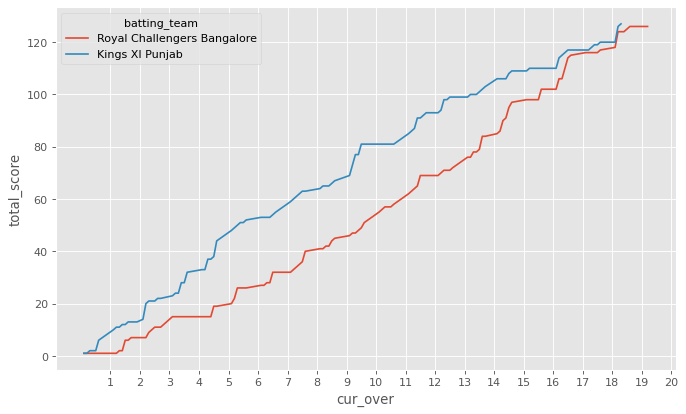

In [356]:
plt.figure(figsize=(10,6),dpi=80)
sns.lineplot(data=cur_mat,x='cur_over',y='total_score',hue='batting_team')
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.show()

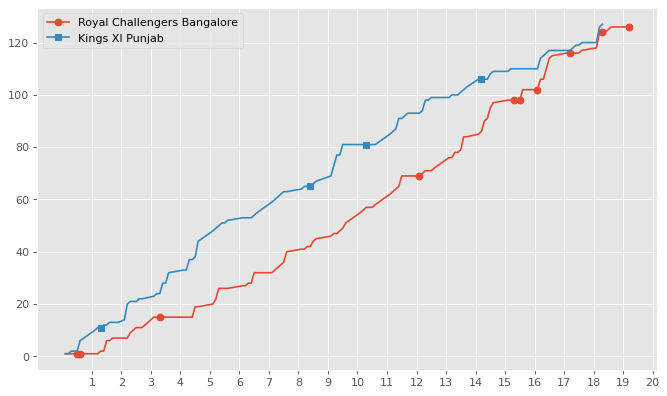

In [357]:
plt.style.use("ggplot")
plt.figure(figsize=(10,6),dpi=80)
plt.plot('cur_over','total_score',data=cur_mat_1,marker='o',ms=6, markevery=marker1)
plt.plot('cur_over','total_score',data=cur_mat_2,marker='s',ms=6, markevery=marker2)
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.legend([team1,team2]);
plt.show()

In [358]:
cur_mat_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             121 non-null    int64  
 1   id                121 non-null    int64  
 2   inning            121 non-null    int64  
 3   over              121 non-null    int64  
 4   ball              121 non-null    int64  
 5   batsman           121 non-null    object 
 6   non_striker       121 non-null    object 
 7   bowler            121 non-null    object 
 8   batsman_runs      121 non-null    int64  
 9   extra_runs        121 non-null    int64  
 10  total_runs        121 non-null    int64  
 11  non_boundary      121 non-null    int64  
 12  is_wicket         121 non-null    int64  
 13  dismissal_kind    10 non-null     object 
 14  player_dismissed  121 non-null    object 
 15  fielder           7 non-null      object 
 16  extras_type       6 non-null      object 
 1

In [359]:
cur_mat_1.batsman.unique()

array(['W Jaffer', 'CL White', 'JH Kallis', 'V Kohli', 'R Dravid',
       'Misbah-ul-Haq', 'P Kumar', 'DT Patil', 'Z Khan', 'A Kumble',
       'DW Steyn'], dtype=object)

In [360]:
pd.DataFrame(cur_mat_1.groupby(["batsman"])["batsman_runs"].sum()).reset_index()

,batsman,batsman_runs
0,A Kumble,3
1,CL White,0
2,DT Patil,4
3,DW Steyn,1
4,JH Kallis,0
5,Misbah-ul-Haq,8
6,P Kumar,0
7,R Dravid,66
8,V Kohli,34
9,W Jaffer,0


In [361]:
pd.DataFrame(cur_mat_2.groupby(["batsman"])["batsman_runs"].sum()).reset_index()

,batsman,batsman_runs
0,DPMD Jayawardene,17
1,IK Pathan,17
2,JR Hopes,5
3,RR Sarwan,31
4,SE Marsh,39
5,Yuvraj Singh,1


In [378]:
pd.DataFrame(cur_mat_1[cur_mat_1.is_wicket == 1 & (cur_mat_1.dismissal_kind != 'run out')].groupby(['bowler'])['is_wicket','total_runs'].sum()).reset_index().rename(columns={'bowler':'Bowler','is_wicket':'Wickets'})

,Bowler,total_runs
0,IK Pathan,0
1,PP Chawla,0
2,S Sreesanth,0
3,VRV Singh,0


In [374]:
cur_mat_1[cur_mat_1.is_wicket == 1 & (cur_mat_1.dismissal_kind != 'run out')]

,index,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,cur_over,total_score
4,5768,336006,1,0,5,W Jaffer,V Kohli,S Sreesanth,0,0,...,0,1,caught,W Jaffer,U Kaul,NaN,Royal Challengers Bangalore,Kings XI Punjab,0.5,1
5,5769,336006,1,0,6,CL White,V Kohli,S Sreesanth,0,0,...,0,1,bowled,CL White,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,0.6,1
76,5718,336006,1,12,1,V Kohli,R Dravid,IK Pathan,0,0,...,0,1,caught,V Kohli,S Sreesanth,NaN,Royal Challengers Bangalore,Kings XI Punjab,12.1,69
97,5739,336006,1,15,3,Misbah-ul-Haq,R Dravid,PP Chawla,0,0,...,0,1,lbw,Misbah-ul-Haq,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,15.3,98
99,5741,336006,1,15,5,P Kumar,R Dravid,PP Chawla,0,0,...,0,1,caught,P Kumar,U Kaul,NaN,Royal Challengers Bangalore,Kings XI Punjab,15.5,98
108,5750,336006,1,17,2,Z Khan,R Dravid,PP Chawla,0,0,...,0,1,bowled,Z Khan,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,17.2,116
115,5757,336006,1,18,3,R Dravid,A Kumble,VRV Singh,0,0,...,0,1,caught,R Dravid,DPMD Jayawardene,NaN,Royal Challengers Bangalore,Kings XI Punjab,18.3,124


In [371]:
pd.DataFrame(cur_mat_2[cur_mat_2.is_wicket == 1 & (cur_mat_2.dismissal_kind != 'run out')].groupby(['bowler'])['is_wicket'].sum()).reset_index().rename(columns={'bowler':'Bowler','is_wicket':'Wickets'})

,Bowler,Wickets
0,P Kumar,2
1,Z Khan,2


In [370]:
cur_mat_2[cur_mat_2.is_wicket == 1 & (cur_mat_2.dismissal_kind != 'run out')]

,index,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,cur_over,total_score
8,5694,336006,2,1,3,JR Hopes,SE Marsh,Z Khan,0,0,...,0,1,caught,JR Hopes,CL White,NaN,Kings XI Punjab,Royal Challengers Bangalore,1.3,11
55,5900,336006,2,8,4,RR Sarwan,SE Marsh,P Kumar,0,0,...,0,1,caught,RR Sarwan,DT Patil,NaN,Kings XI Punjab,Royal Challengers Bangalore,8.4,65
66,5921,336006,2,10,3,Yuvraj Singh,SE Marsh,P Kumar,0,0,...,0,1,caught,Yuvraj Singh,DT Patil,NaN,Kings XI Punjab,Royal Challengers Bangalore,10.3,81
91,5855,336006,2,14,2,SE Marsh,DPMD Jayawardene,Z Khan,0,0,...,0,1,bowled,SE Marsh,NaN,NaN,Kings XI Punjab,Royal Challengers Bangalore,14.2,106


In [379]:
cur_mat_1.groupby(['bowler'])['total_runs'].sum()

bowler
Gagandeep Singh    28
IK Pathan          13
JR Hopes           11
PP Chawla          25
S Sreesanth        16
VRV Singh          33
Name: total_runs, dtype: int64

In [385]:
cur_mat_1[cur_mat_1.bowler == 'JR Hopes'][['total_runs','batsman_runs','extra_runs']]

,total_runs,batsman_runs,extra_runs
70,4,4,0
71,1,0,1
72,1,1,0
73,1,1,0
74,4,4,0
75,0,0,0


In [386]:
cur_mat_1[cur_mat_1.bowler == 'JR Hopes']

,index,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,cur_over,total_score
70,5712,336006,1,11,1,V Kohli,R Dravid,JR Hopes,4,0,...,0,0,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,11.1,62
71,5713,336006,1,11,2,V Kohli,R Dravid,JR Hopes,0,1,...,0,0,NaN,0,NaN,legbyes,Royal Challengers Bangalore,Kings XI Punjab,11.2,63
72,5714,336006,1,11,3,R Dravid,V Kohli,JR Hopes,1,0,...,0,0,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,11.3,64
73,5715,336006,1,11,4,V Kohli,R Dravid,JR Hopes,1,0,...,0,0,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,11.4,65
74,5716,336006,1,11,5,R Dravid,V Kohli,JR Hopes,4,0,...,0,0,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,11.5,69
75,5717,336006,1,11,6,R Dravid,V Kohli,JR Hopes,0,0,...,0,0,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab,11.6,69
